In [ ]:
using Pkg
Pkg.add("MLDatasets")

In [ ]:
Pkg.add("Images")

In [ ]:
Pkg.add("TestImages")

In [21]:
using MLDatasets
using Images
using TestImages
using Plots

In [22]:
train_x, train_y = MNIST.traindata()
test_x,test_y = MNIST.testdata();

In [23]:
train_x[:,:,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

In [24]:
train_y

60000-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [25]:
using Pkg
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")
Pkg.add("ImageMagick")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


First  image in train dataset is 5


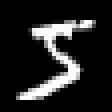

In [26]:
println("First  image in train dataset is ", train_y[1])
colorview(Gray, train_x[:,:,1]')

In [27]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:,:,i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
    end 
train_data = [x for x in zip(X,Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:,:,i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
    end 
test_data = [x for x in zip(X,Y)];

In [28]:
train_data[1]

(Normed{UInt8,8}[0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0])

In [29]:
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x) * (1 - σ(x))

mutable struct neural_network
    W
    b
end 

function create_network(input_layer_size, hidden_layer_size, output_layer_size)

    W = [[0.0], randn(hidden_layer_size[1], input_layer_size)]
    
    b = [[0.0], randn(hidden_layer_size[1])]
    
    for i = 2:length(hidden_layer_size)
        push!(W, randn(hidden_layer_size[i], hidden_layer_size[i-1]))
        push!(b, randn(hidden_layer_size[i]))
        end 
    push!(W, randn(output_layer_size, hidden_layer_size[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W,b)
end

create_network (generic function with 1 method)

In [30]:
NN = create_network(784, [100,100,100], 10)

neural_network(Array{Float64,N} where N[[0.0], [-0.239747979821878 0.8867855982200052 … -0.7804740157821578 -0.554630890321935; 1.4406849172898128 -0.2487462843813549 … 0.01942889848509619 0.8040616906782408; … ; -0.4065741583817321 -1.0634143826129951 … -0.4224826567933005 0.9625558192198749; 1.4701103649403982 -2.770387211606187 … -0.29896799692531906 0.1600751633452989], [0.724808056610246 2.134594795922816 … -0.37295930360649643 -0.3161539169515497; 2.0617604407092154 -0.7279083193878723 … -1.3538771782128456 0.29528769335047567; … ; -0.24383321512427503 -6.879246242360925e-5 … 0.2182338040334163 -0.35235508409701527; 0.05545792553671477 -1.5286887157583582 … 1.1172510947062542 -0.2813977511020856], [-0.3790299605004553 -0.25788853752756136 … -0.18579424952678553 -0.9825454322866527; 0.3141791779216721 -0.317390238373911 … 0.6990595495382049 -0.40408534178973143; … ; -0.12136197330082678 2.5888583873676727 … 0.5675964726489682 -1.0897811897933036; -1.6092048481791874 -0.67679094350

In [31]:
for w in NN.W
    print(size(w),"\n")
end

(1,)
(100, 784)
(100, 100)
(100, 100)
(10, 100)


In [32]:
for b in NN.b
    print(size(b),"\n")
end

(1,)
(100,)
(100,)
(100,)
(10,)


In [33]:
function forward_pass(network, training_instance)
    Z = [[0.0]]
    
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i] * A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end 
    return Z, A
end

function predict(network, training_instance)
    Z,A = forward_pass(network, training_instance)
    return argmax(A[end]) -1 
end 

function success_percentage(network, data_set)
    return sum([predict(network, x)== argmax(x[2]) - 1 ? 1 : 0 for x in data_set]) / length(data_set)*100
end 



success_percentage (generic function with 1 method)

In [34]:
success_percentage(NN, test_data)

8.97

In [35]:
function error_deltas(network, training_instance)
    L = size(network.W)[1]
    Z , A =  forward_pass(network, training_instance)
    δ = [(A[end] - training_instance[2]).* dσ.(Z[end])]
    
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end 
    
    pushfirst!(δ, [0.0])
    return A, δ
end

error_deltas (generic function with 1 method)

In [36]:
A_test, δ_test = error_deltas(NN, train_data[1]);

In [48]:
δ_test[end]

10-element Array{Float64,1}:
  0.09692271796329521
  0.0
  0.0018682772014203025
  0.08824980928458592
  0.009604455399535153
 -0.14646254619848978
  0.00021434398011097172
  0.14687482310750866
  0.09720097810655147
  0.019840872495471507

In [82]:
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:size(data_set)[1] - mini_batch_size)
    return data_set[k:k+mini_batch_size]
end 

function mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)
    batch = make_random_mini_batch(mini_batch_size, data_set)
    
    L = length(network.W)
    
    A, δ = error_deltas(network, batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(network, batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
        end 
    for l = L:-1:2
        network.W[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l] for i = 1:mini_batch_size])
        end 
end

mini_batch_update! (generic function with 2 methods)

In [84]:
for i = 1:60000
    mini_batch_update!(NN, 2, train_data, 0.4)
    if i % 5000 == 0
        println("Epochs ",i)
        println("The percentage of correct classified images is:",success_percentage(NN, test_data),"\n")       
    end
end

Epochs 5000
The percentage of correct classified images is:86.33999999999999

Epochs 10000
The percentage of correct classified images is:88.32

Epochs 15000
The percentage of correct classified images is:89.8

Epochs 20000
The percentage of correct classified images is:90.16

Epochs 25000
The percentage of correct classified images is:90.91

Epochs 30000
The percentage of correct classified images is:91.24

Epochs 35000
The percentage of correct classified images is:91.42

Epochs 40000
The percentage of correct classified images is:90.64

Epochs 45000
The percentage of correct classified images is:92.01

Epochs 50000
The percentage of correct classified images is:91.13

Epochs 55000
The percentage of correct classified images is:92.24

Epochs 60000
The percentage of correct classified images is:92.55



Conclusion: as we saw above, if we increase batch size or give descrease number of learning rate,it could increase accurancy prediction of model. 

In [85]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i])
end

function Predict_image(network::neural_network, i::Int64, testing_data)
    println("Predicted number: ", predict(network, test_data[i]))
    println("Actual Number: ", argmax(testing_data[i][2]) -1)
    show_test_img(i)
end

Predict_image (generic function with 1 method)

Predicted number: 8
Actual Number: 8


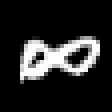

In [86]:
i  =  rand([x for x = 1:10000])
Predict_image(NN, i, test_data)